#Library, Dates, Data

In [1]:
#installing libraries
!pip install yfinance
!pip install tfcausalimpact

In [2]:
#import libraries
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Dates
training_start = "2014-01-08"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-02"

In [29]:
#Download VW stock
y = ["VOW.DE"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1wk")
y = y['Adj Close'].rename("y")
y.head(1)

/tmp/ipython-input-2015183275.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  y = yf.download(tickers = y,
[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'

In [5]:
#Dowload the control groups
stocks = ["META", "DIS", "NVS", "AMZ"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1wk")
X = X.iloc[:,:len(stocks)]
X.columns = X.columns.droplevel()
X.head()

/tmp/ipython-input-1825953121.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  X = yf.download(tickers = stocks,
[*********************100%***********************]  4 of 4 completed


Ticker,AMZ,DIS,META,NVS
Date,,,,
2014-01-06,290.200012,68.244949,57.623867,47.175335
2014-01-13,296.000000,66.968582,55.992821,47.082542
2014-01-20,287.000000,65.828003,54.152912,46.305374
2014-01-27,271.299988,65.728409,62.228607,45.858795
2014-02-03,260.450012,68.498405,63.969055,46.931759


In [6]:
#Combine everything
X.index = X.index.tz_localize(None)
df = pd.concat([y, X], axis = 1).dropna()
df.head()

,"(Close, VOW.DE)","(High, VOW.DE)","(Low, VOW.DE)","(Open, VOW.DE)","(Volume, VOW.DE)",AMZ,DIS,META,NVS
Date,,,,,,,,,
2014-01-06,132.025055,133.786296,130.433174,131.449272,266513,290.200012,68.244949,57.623867,47.175335
2014-01-13,133.684692,134.023392,128.502584,132.533106,468531,296.000000,66.968582,55.992821,47.082542
2014-01-20,125.318810,134.057252,125.251065,133.007292,434638,287.000000,65.828003,54.152912,46.305374
2014-01-27,122.168900,128.638051,120.102831,125.318800,514920,271.299988,65.728409,62.228607,45.858795
2014-02-03,123.625320,124.234975,116.478759,122.541478,392696,260.450012,68.498405,63.969055,46.931759


#Correlation Matrix

In [7]:
#Subset the training data
df_training = df[df.index <= training_end]
df_training.tail()

,"(Close, VOW.DE)","(High, VOW.DE)","(Low, VOW.DE)","(Open, VOW.DE)","(Volume, VOW.DE)",AMZ,DIS,META,NVS
Date,,,,,,,,,
2015-07-13,143.366348,148.105145,139.617744,145.629653,463355,445.350006,109.596367,94.451828,65.229691
2015-07-27,130.175522,136.788616,129.114597,133.994848,602228,484.250000,110.647499,93.497063,63.959743
2015-08-10,127.311035,137.319093,125.648915,136.788630,570356,478.299988,98.808220,93.904839,63.176804
2015-08-17,116.701782,129.220699,116.701782,128.690236,540587,445.049988,91.136673,85.590439,60.143738
2015-08-24,120.591812,121.971013,107.896078,113.059249,837898,465.399994,94.492973,90.513443,60.630753


<Axes: >

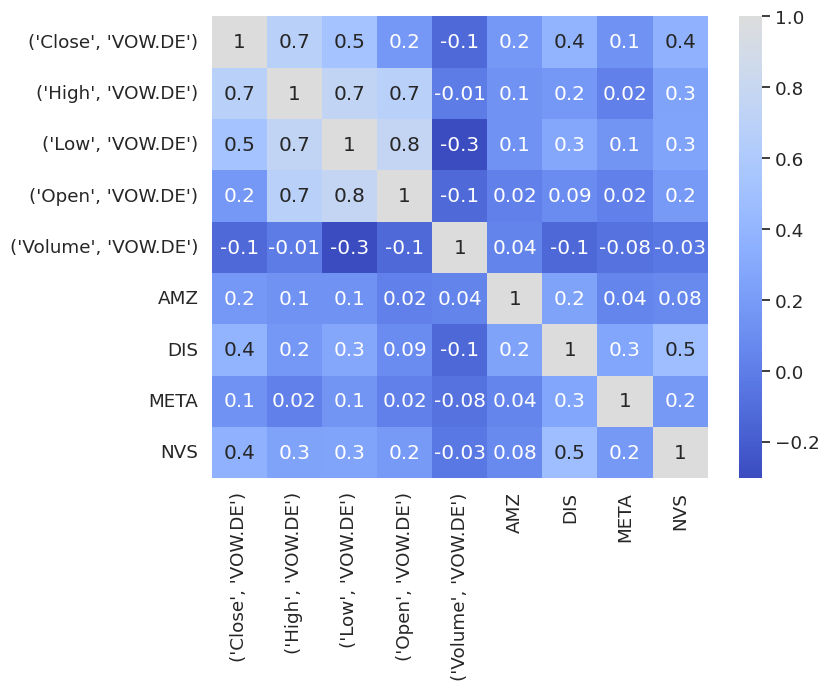

In [8]:
#Heatmap
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(data = df_training.pct_change().dropna().corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'coolwarm',
            center = True)

In [9]:
#Preparing final df
df_final = df.drop(columns = ["META", "AMZ"])
df_final.head(0)

,"(Close, VOW.DE)","(High, VOW.DE)","(Low, VOW.DE)","(Open, VOW.DE)","(Volume, VOW.DE)",DIS,NVS
Date,,,,,,,


#Google Casual Impact

In [10]:
#Get first and last date
print(df_final.head(1))
print(df_final.tail(10))

            (Close, VOW.DE)  (High, VOW.DE)  (Low, VOW.DE)  (Open, VOW.DE)  \
Date                                                                         
2014-01-06       132.025055      133.786296     130.433174      131.449272   

            (Volume, VOW.DE)        DIS        NVS  
Date                                                
2014-01-06            266513  68.244949  47.175335  
            (Close, VOW.DE)  (High, VOW.DE)  (Low, VOW.DE)  (Open, VOW.DE)  \
Date                                                                         
2015-07-13       143.366348      148.105145     139.617744      145.629653   
2015-07-27       130.175522      136.788616     129.114597      133.994848   
2015-08-10       127.311035      137.319093     125.648915      136.788630   
2015-08-17       116.701782      129.220699     116.701782      128.690236   
2015-08-24       120.591812      121.971013     107.896078      113.059249   
2015-08-31       113.129974      120.202808     112.811699  

In [11]:
#Dates
training_start = "2014-01-06"
training_end = "2015-08-31"
treatment_start = "2015-09-07"
treatment_end = "2015-09-28"
end_stock = "2015-10-02"

In [12]:
#Define Pre and Post Period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [28]:
#CI
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)

ValueError: Length of names must match number of levels in MultiIndex.

In [22]:
#Output
impact.plot()

NameError: name 'impact' is not defined

In [23]:
#summary
print(impact.summary())

NameError: name 'impact' is not defined